<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/1200px-Pandas_logo.svg.png" width="25%" height="25%" />

# Pandas - Unit 14 - Group By

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%202%20-%20Unit%20Objective.png"> Unit Objectives

* Group our data based on attributes and aggregate functions

---

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%204%20-%20Import%20Package%20for%20Learning.png"> Import Package for Learning

import numpy as np
import pandas as pd

---

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Group By

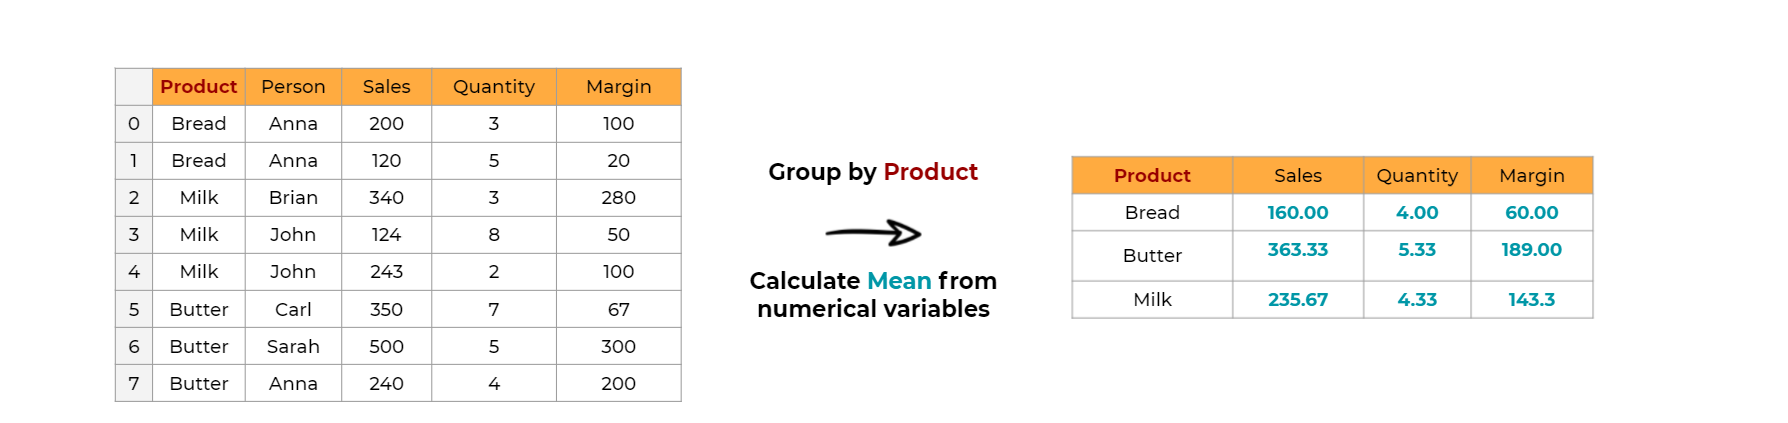

The groupby method allows you to **group rows of data together and call aggregate functions.**
* It can be used to group large amounts of data and compute operations on them. The documentation is [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)


Consider the following data. It is a fictional revenue, quantity and margin record for your team considering a set of products for a given month
  * At first, you are interested to check performance in product level

data = {'Product':['Bread','Bread','Milk','Milk','Milk','Butter','Butter','Butter'],
        'Person':['Anna','Anna','Brian','John','John','Carl','Sarah','Anna'],
        'Sales':[200,120,340,124,243,350,500,240],
        'Quantity':[3,5,3,8,2,7,5,4],
        'Margin':[100,20,280,50,100,67,300,200]}

df = pd.DataFrame(data)
df

You can use `.groupby()` to group your data. The argument is 'by' and receives a list with the columns you are interested to group. In this case, it is one column: 'Product'
* This **method itself doesn’t really do any operations** to produce a useful result **until** you aggregate it.
* For teaching purposes, let's first group and assign to a variable. You will notice the output is a object, but you can't see much

by_group = df.groupby(by=['Product'])
by_group

You can iterate across the object's elements to check how it was grouped

for product, frame in by_group:
  print(f"Entries for '{product}' ")
  print("------------------------")
  print(f"{frame} \n\n")

You should apply a function to `.groupby()` to reveal more interesting information
  * Imagine if you want to know the average levels of sales, quantity and margin per product. You can chain with the method `.mean()`
  * We added the method `.round()`, so the numerical values decimals can be rounded to a value we are interested in. The documentation is [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.round.html)

df.groupby(by=['Product']).mean().round(2)

Get the minimum values with `.min()`
  * Let's make sense of it, but first let's recap df

df

Now we groupby 'Product' and aggregate by `.min()`
  * The values indicated in the answer are minimum levels for each variable separately.
  * For example, it might be tempting to conclude that for Milk, Brian made the lowest sales of 124 with margin of 50. This is not the case
    * Particularly for Milk, the person that made the least amount of Sales was John (2 sales). 
    * For the milk group Brian is the minimum Person because, B is 66 in ascii an J (John) is 74
    * The lowest sales was 124, when we look to the data we see it was made by John. 
    * The lowest margin was 50, when looking to the data, it was made by John
    * The lowest quantity is 2, when looking to the data, it was made by John

df.groupby(by= ['Product']).min()

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> **PRACTICE** : We will consider the dataset, which consists of people, the County they are from, the programming language they use and how many years of experience they have using it.







data = {'first_name':['Cliona','Emily','Sean','John','Adam','Jane','Sarah','Carl'],
        'county':['Dublin','Dublin','Kildare','Dublin','Dublin','Kildare','Kildare','Kilkenny'],
        'language':['python','javascript','javascript','python','python','python','javascript','python'],
        'age':[23,45,31,26,56,45,43,27],
        'years_experience':[5,2,7,5,3,2,4,6]}

df_practice = pd.DataFrame(data)
df_practice

Feel free to try out your ideas to group the data by or use the following.

You are looking to find out the mean years_experience in a language by County, so you will need to group by two columns and then use the mean method. You should also round to two decimal places.

# Write your code here.
df_practice_group = df_practice.groupby(by=['county']).mean().round(2)
df_practice_group

---

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> You can use the `.describe()` method in your grouped data
  * You can see for each product, the summary statistics of all other variables

df.groupby(by=['Product']).describe().round(2)

If you prefer, you can transpose a DataFrame adding `.T` to it.
* If that helps you to see the result better, you may use. If not, don't use it
* `.T` can be applied to a DataFrame. Since the result of `.describe(`) is a DataFrame, it works

df.groupby(by= ['Product']).describe().round(2).T

Naturally you can add the argument `include='all'` for `.describe()` to consider categorical variables in your analysis
* You will notice it has added the information for Person, where before you only had Sales, Quantity and Margin

df.groupby(by=['Product']).describe(include='all').round(2)

* You can group by more than one variable, in this case by Person and Product.
  * You will notice the summary statistics brokedown by each Person and each Product that a given person sold

df.groupby(by=['Person','Product']).describe().round(1)

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> **PRACTICE** : We will consider the tips dataset for practice. It holds records for waiter tips, based on day of the week, day time, total bill, gender, if it is a smoker table or not, and how many people were at the table.



import seaborn as sns
df_practice = sns.load_dataset('tips')
print(df_practice.shape)
df_practice.head(10)


Feel free to try out your ideas to group the data, or use the following suggestion.


You are looking to find the summary statistics broke down by day and time.

# Write your code here.
df_practice.groupby(by=['day','time']).describe().round(2)

---

Getting back to aggreations alternative methods. You may be interested to aggegate more than one function
  * You can groupby and chain `.agg()` to aggregate multiple functions. The documentation is found [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html). The arguments are the functions you are interested in, in this case '`mean`','`min`' and '`max`' parsed in a list.

(df
 .groupby(by=['Product'])
 .agg(['mean','min','max'])
 .round(1)
 )

Naturally, you can group by more than one variable, in this case: Person and Product, in this order
* For this exercise we are interested only in Sales and Margin levels. After you groupby, you can subset the variables you are interested in, using the brackets approach, in this case: 'Sales' and 'Margin'

(df
 .groupby(by=['Person','Product'])
 ['Sales','Margin']
 .agg(['mean','min','max'])
 .round(2)
)

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> **PRACTICE** : We will consider the tips dataset for practice. It holds records for waiter tips, based on day of the week, day time, total bill, gender, if it is a smoker table or not, and how many people were at the table.



import seaborn as sns
df_practice = sns.load_dataset('tips')
print(df_practice.shape)
df_practice.head(10)


Feel free to try out your ideas or use the following suggestion.

You are interested in finding out the mean and max values of ``total_bill`` and ``tip`` rounded to two places, grouped by ``day`` and ``time.``
* so you would have total_bill and tip as the variables you **subset**, using the brackets approach,
 * Your output should look like below

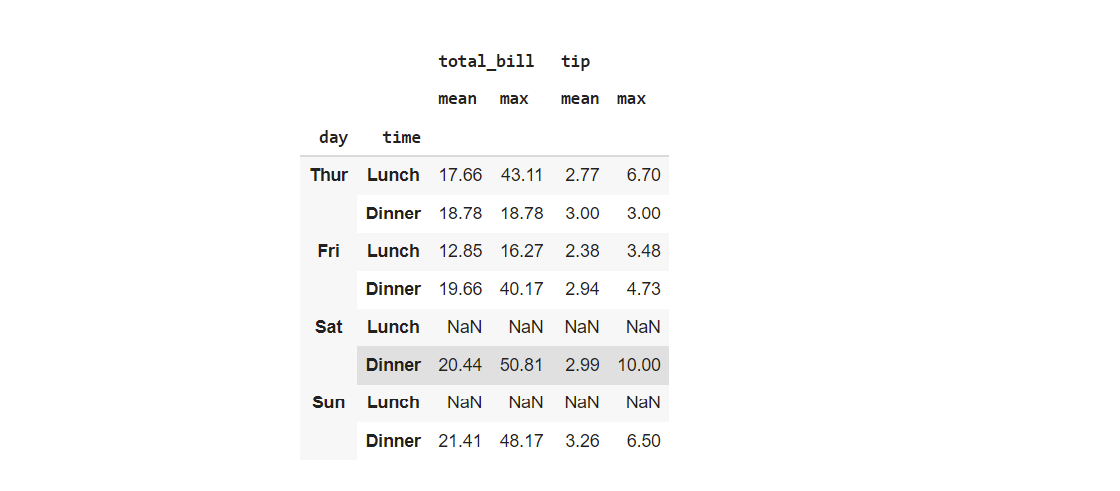

# Write your code here
(df_practice
 .groupby(by=['day','time'])
 ['total_bill','tip']
 .agg(['mean','max'])
 .round(2)
)

---

You can apply custom functions when groupping and aggregating
  * Let's forecast sales for next month based on the sum of Sales and multiply by 1.5. This logic is fictitious and serves to explain the concept
  * The function `sales_forecast_next_month` is parsed into the list at `.agg()`

def sales_forecast_next_month(x):
  return x.sum() * 1.5

(df
 .groupby(by=['Product'])
 ['Sales']
 .agg(['sum','mean',sales_forecast_next_month])
 .round(2)
 )




You noticed that the results up to now generated a DataFrame that is multi indexed. In this exercise we present another way to groupby, aggregate and create columns with multiple use cases in a DataFrame format that is more in line to the DataFrame format we have been working on
  * First let's recap df

df

The structure is the following:
  * You `.groupby()` as usual
  * At `.agg()` you will parse the column name and a tuple. The tuple contains a variable you will aggregate and the aggregation function.
    * In the example, we create a column called `Total_of_Sales` (note it is not a string) using Sales variable and the aggregation function 'sum'
    * We keep this pattern and create columns based on specific variables and aggregation functions
  * After it, you add `.reset_index()` to remove MultIndex

You are interested to generate a report per product, showing its performance in terms of margin, sales, sales average, total quantity , the team and a forecast, broken down per product. 

df_report = (df
             .groupby(by=['Product'])
             .agg(Total_of_Margin=('Margin','sum'),
                  Total_of_Sales=('Sales','sum'),
                  Avg_of_Sales=('Sales','mean'),
                  Quantity=('Quantity','sum'),
                  Number_of_People_Selling=('Person','nunique'),
                  Team=('Person','unique'),
                  SalesForecastForNextMonth=('Sales',sales_forecast_next_month)
                  )
             .reset_index()
             
             )

df_report

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> **PRACTICE** : We will consider the tips dataset for practice. It holds records for waiter tips, based on day of the week, day time, total bill, gender, if it is a smoker table or not, and how many people were at the table.



import seaborn as sns
df_practice = sns.load_dataset('tips')
print(df_practice.shape)
df_practice.head(10)


Feel free to try out your ideas or use the following suggestion.

You wish to get the total sales per day and a count of the number of tables served per day and display this data in separate columns.

* You should group by ``day``
* Create a column named ``Total_of_Sales,`` using the total_bill variable and the aggregation function 'sum'
* Create a column named ``Tables_Served,`` using the time variable and the aggregation function 'count'
* And you should reset the index




# Write your code here
df_practice_report=(df_practice
                   .groupby(by=['day'])
                    .agg(
                        Total_of_Sales=('total_bill','sum'),
                        Tables_Served=('time','count'),
                        )
                    .reset_index()                   
                   )
df_practice_report

---

Say now you are interested to add one level and evaluate the performance: per `person` and per `product`
* Just parse in a list these variables at `.groupby()`. 
* The mechanics for `.agg()` remains the same

(df
 .groupby(by=['Person','Product'])
 .agg(Total_of_Sales=('Sales','sum'),
      Quantity=('Quantity','sum'),
      Total_of_Margin=('Margin','sum'))
 .reset_index()
  )

---